
# Exploratory Data Analysis (EDA)  of PEA01 population Estimates since 1950
Notebook provides an exploratory data analysis (EDA) of the PEA01 dataset, which contains population estimates since 1950 grouped by age group and sex and year and  has estimated  Inter-Censal data.  


The analysis includes data loading, initial exploration, data cleaning,  trend analysis, and dealing with  data redundancies.

The PEA01 population Estimates figures are part of the series of datasets used in the CSO Population and Migration Estimates Report - April 2023.  The complete series of datasets can be found at
[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

| Code   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |        |
| PEA04  | Region                    |        |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |        |
| PEA24  | Citizenship Immigration   |        |
| PEA25  | Citizenship Population    |        |

Click on the image to explore reconfigure the data at source.

<a href="https://data.cso.ie/table/PEA01">
    <img src="../images/PEA01.png" alt="Example Image" width="500"/>
</a>




## Data Loading Data Libraries and Functions
The dataset is loaded from the `../raw/PEA01.csv` file.


In [92]:
#  Import Libraries
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
# Adjusting default font sizes for all plots
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Load the data
df = pd.read_csv('../raw/PEA01.csv')
# Create the images directory if it doesn't exist
images_directory = '../images'
if not os.path.exists(images_directory):
    os.makedirs(images_directory)
# Directory path
data_directory = '../data'
# Check if the directory exists as I often delete it during development stages
if not os.path.exists(data_directory):
    os.makedirs(data_directory)


## Exploratory Data Analysis
Exploring the basic structure, descriptive statistics, and dealing with missing values.


In [93]:
# Preview top 5 rows
df.head() # Note examples of missing population data in the 4th and 5th row

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [94]:
#  Data Structure and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [95]:
#  Statistical Summary
df.describe()

,Year,VALUE
count,5994.000000,5880.000000
mean,1986.500000,346.879235
std,21.361791,601.850822
min,1950.000000,5.500000
25%,1968.000000,79.475000
50%,1986.500000,151.600000
75%,2005.000000,307.725000
max,2023.000000,5281.600000


In [96]:
#  Check for Missing Values
df.isnull().sum()

STATISTIC Label      0
Year                 0
Age Group            0
Sex                  0
UNIT                 0
VALUE              114
dtype: int64

In [57]:
#  Unique Values
df.nunique()

STATISTIC Label       1
Year                 74
Age Group            27
Sex                   3
UNIT                  1
VALUE              3389
dtype: int64

In [58]:
# #  Correlation Matrix
# df.corr()
#  Data Visualization
#  Additional Exploration
# Additional code as per the specific needs 

In [59]:
# Viewing and critique the column names 
df.columns

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')

In [60]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'STATISTIC Label': array(['Population Estimates (Persons in April)'], dtype=object),
 'Age Group': array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
        '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
        '15 years and over', '20 - 24 years', '25 - 29 years',
        '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
        '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '65 years and over',
        '70 - 74 years', '75 - 79 years', '80 - 84 years',
        '85 years and over', 'All ages'], dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'UNIT': array(['Thousand'], dtype=object)}

In [61]:
# Check if the columns 'STATISTIC Label' and 'UNIT' exist in the DataFrame
columns_to_drop = [col for col in ['STATISTIC Label', 'UNIT'] if col in df.columns]

# Drop the columns if they exist
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)

# Renaming the remaining columns according to pythonic conventions
df = df.rename(columns={
    'Year': 'year',
    'Age Group': 'age_group',
    'Sex': 'sex',
    'VALUE': 'value'
})
#preview changes
df.head()


,year,age_group,sex,value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN


In [62]:

# Save the DataFrame to CSV
df.to_csv('../data/population_reformat.csv', index=False)


## Duplication

In [63]:
duplicates = df.duplicated()
duplicates.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [64]:
# Check for duplicated rows in the DataFrame
any_duplicates = df.duplicated().any()

# Print result based on the condition
if any_duplicates:
    print("There are duplicated rows in dataframe df.")
else:
    print("There are no duplicated rows in dataframe df.")


There are no duplicated rows in dataframe df.


In [65]:
# NaNs mask summed per column.
df.isna().sum()

year           0
age_group      0
sex            0
value        114
dtype: int64

In [91]:
# To show the distribution of missing values in 'VALUE' before 1996, grouped by 'Age Group' and 'Gender'
missing_distribution = df[df['value'].isnull()].groupby(['age_group', 'sex']).size()
missing_distribution


Series([], dtype: int64)

## Missing data <1996

In [67]:
# Filter for rows where 'value' is missing using .isnull() method Pre edit
missing_value = df.value.isnull()


# Filter the original DataFrame using this mask
df_missing_value = df[missing_value]

# Find the maximum year in this filtered DataFrame
last_year_missing = df_missing_value.year.max()  

print(f"The last year with missing data in the 'value' field is: {last_year_missing}")

The last year with missing data in the 'value' field is: 1995


In [68]:
# Filter the original DataFrame using this mask
df_missing_value = df[df.value.isnull()]
# df_missing_value

In [69]:
# # Find most recent year that has Nans.
print(f"The last year with missing data in the 'value' field is: {df_missing_value.year.max() }")

The last year with missing data in the 'value' field is: 1995


## Visualise the missing data with a heatmap and a bar chart

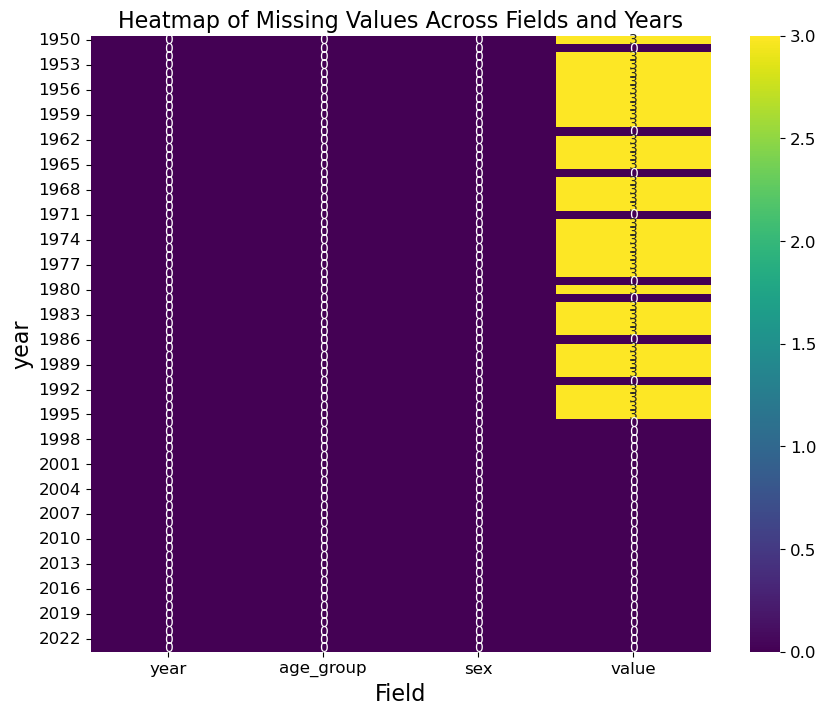

In [70]:

# Check for missing values -Exces to requiremants
missing_values = df.isnull()

# Group by 'Year' and count missing values for each field
missing_summary = missing_values.groupby(df.year).sum()


# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(missing_summary, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Missing Values Across Fields and Years')
plt.ylabel('year')
plt.xlabel('Field')

# Save the plot before displaying it
plt.savefig('../images/population_missing_heatmap.png')
plt.show()


In [71]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'age_group': array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
        '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
        '15 years and over', '20 - 24 years', '25 - 29 years',
        '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
        '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '65 years and over',
        '70 - 74 years', '75 - 79 years', '80 - 84 years',
        '85 years and over', 'All ages'], dtype=object),
 'sex': array(['Both sexes', 'Male', 'Female'], dtype=object)}

###  Feature Engineering  

The NaNs in 
0 - 4 years 
<1996  (38 of 46 values)  
replaced with  sum of 'value' column for 
'1 - 4 years' and 
'Under 1 year'

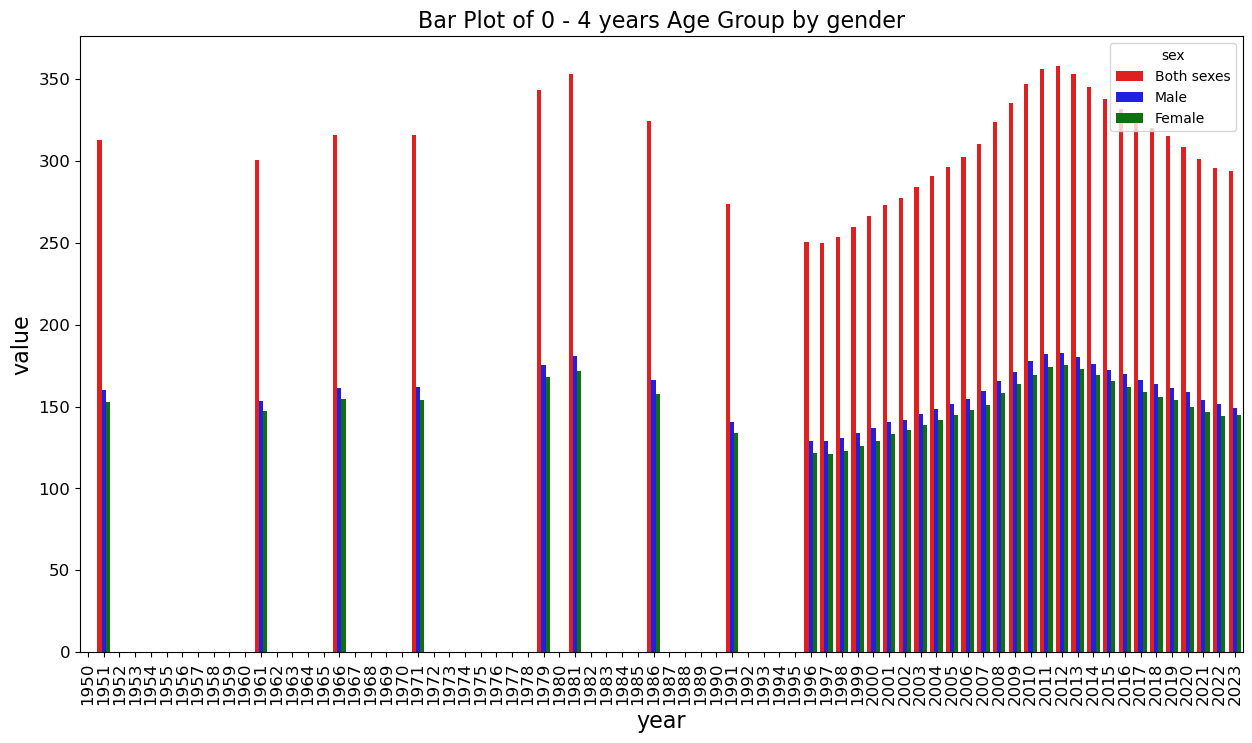

In [72]:
# Keep only '0 - 4 years' age group for all sex categories 
filtered_df = df[(df['age_group'] == '0 - 4 years') & (df['year'] <=2023)]



# Set the size of the plot
plt.figure(figsize=(15, 8))

# Define a color palette for the 'sex' categories
palette = {"Male": "blue", "Female": "green", "Both sexes": "red"}

# Create a bar plot with with defined color palette
sns.barplot(x='year', y='value', hue='sex', data=filtered_df, palette=palette)

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Title of the plot
plt.title('Bar Plot of 0 - 4 years Age Group by gender')

# Save the plot 
plt.savefig('../images/population_missing_barchart.png')

# Display the plot
plt.show()



## Data Engineering Strategy to replace missing 0 - 4 years data 

In [73]:

# Filter further to less than or equal to 1995
filtered_df = df[(df['age_group'].isin(['Under 1 year', '0 - 4 years', '1 - 4 years'])) & (df['year'] <= 1995)]
filtered_df

,year,age_group,sex,value
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
...,...,...,...,...
3649,1995,0 - 4 years,Male,NaN
3650,1995,0 - 4 years,Female,NaN
3654,1995,1 - 4 years,Both sexes,207.3
3655,1995,1 - 4 years,Male,106.7


In [74]:
# List of protected years
protected_years = [1951, 1961, 1966, 1971, 1979, 1981, 1986, 1991] + list(range(1996, 2024))

# Filter out the protected years
unprotected_years = [year for year in range(1950, 2024) if year not in protected_years]

In [75]:
# Process the data for years that are not protected
for year in df['year'].unique():
    if year not in protected_years and year < 1996:
        for sex in ['Male', 'Female']:
            # Sum the value for '1 - 4 years' and 'Under 1 year' for the current sex category
            sum_value = df[(df['age_group'].isin(['1 - 4 years', 'Under 1 year'])) &
                           (df['year'] == year) &
                           (df['sex'] == sex)]['value'].sum()
        
            # Update the corresponding '0 - 4 years' value for the current sex category
            df.loc[(df['age_group'] == '0 - 4 years') &
                   (df['year'] == year) &
                   (df['sex'] == sex), 'value'] = round(sum_value, 1)
        
        # Calculate 'Both sexes' value for '0 - 4 years' as the sum of 'Male' and 'Female'
        male_value = df.loc[(df['age_group'] == '0 - 4 years') &
                            (df['year'] == year) &
                            (df['sex'] == 'Male'), 'value'].sum()
        female_value = df.loc[(df['age_group'] == '0 - 4 years') &
                              (df['year'] == year) &
                              (df['sex'] == 'Female'), 'value'].sum()
        
        df.loc[(df['age_group'] == '0 - 4 years') &
               (df['year'] == year) &
               (df['sex'] == 'Both sexes'), 'value'] = round(male_value + female_value, 1)

## Visually check engineered 0-4 years profile

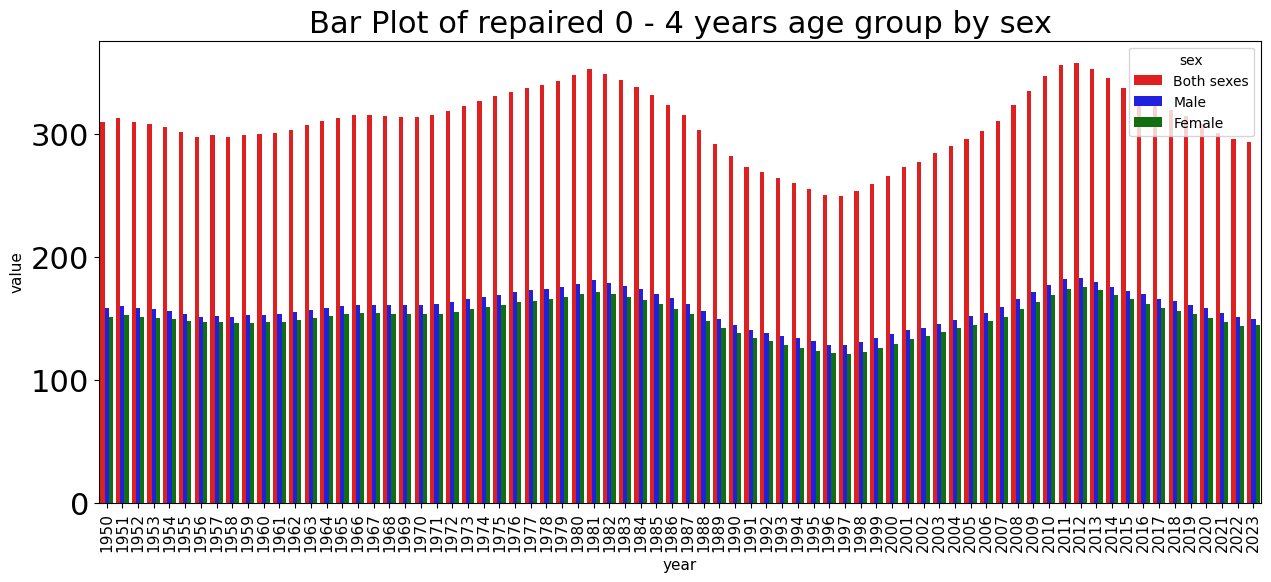

In [76]:
# Keep only '0 - 4 years' age group for all sex categories and years up to and including 1995
filtered_df = df[(df['age_group'] == '0 - 4 years') ]

# Adjusting font sizes
plt.rcParams['axes.titlesize'] = 22   # For title
plt.rcParams['axes.labelsize'] = 11   # For x and y labels
plt.rcParams['xtick.labelsize'] = 11  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 22  # For y-axis tick labels

# Set the size of the plot
plt.figure(figsize=(15, 6)) 

# Define a color palette for the 'sex' categories
palette = {"Male": "blue", "Female": "green", "Both sexes": "red"}

# Create a bar plot with a specified color palette
sns.barplot(x='year', y='value', hue='sex', data=filtered_df, palette=palette)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Bar Plot of repaired 0 - 4 years age group by sex')

# Save the plot 
plt.savefig('../images/population_0_4_repaired.png')

# Display the plot
plt.show()

In [77]:
# Unique values in non-numeric columns -Can drop later
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'age_group': array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
        '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
        '15 years and over', '20 - 24 years', '25 - 29 years',
        '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
        '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '65 years and over',
        '70 - 74 years', '75 - 79 years', '80 - 84 years',
        '85 years and over', 'All ages'], dtype=object),
 'sex': array(['Both sexes', 'Male', 'Female'], dtype=object)}

In [78]:
# Save the clean DataFrame to a new CSV file
df.to_csv('../data/population_clean.csv', index=True)

### Visualise overlapping age_group kvalues

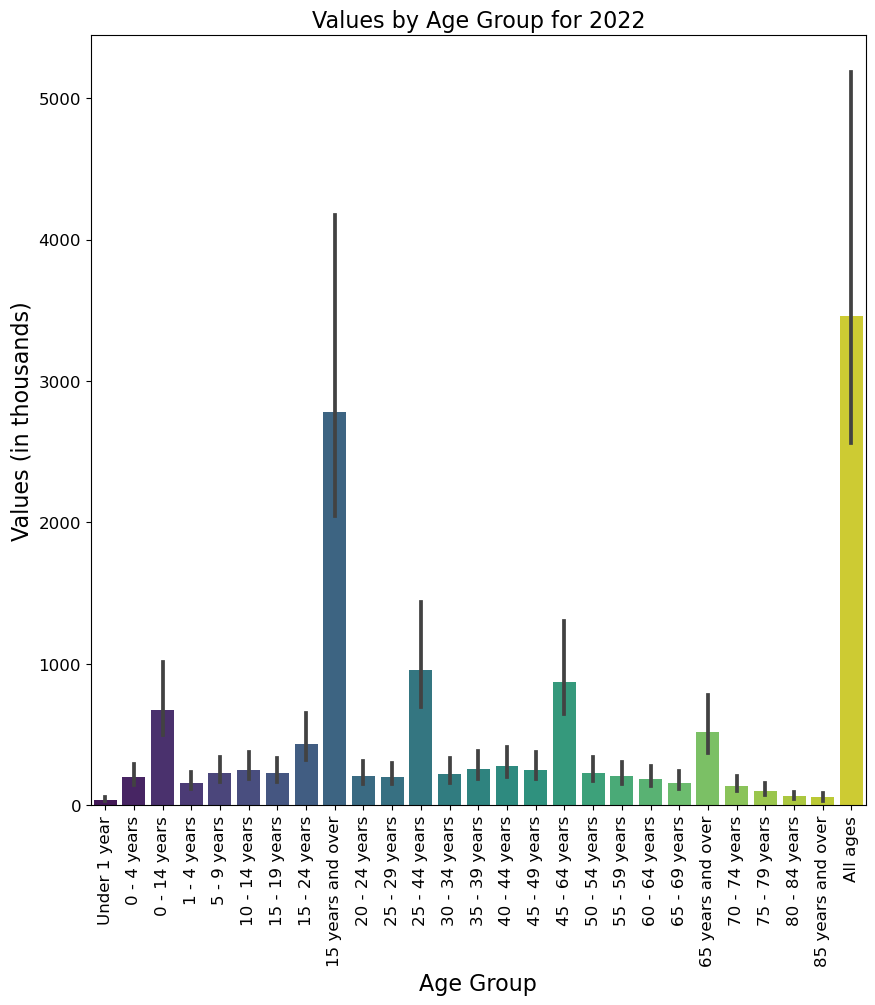

In [79]:

# Adjusting font sizes
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels

# Plotting the values for each age_group in 2022 
plt.figure(figsize=(10, 10))  
sns.barplot(data=df[df['year'] == 2022], x='age_group', y='value', palette='viridis')

# Add title and labels
plt.title('Values by Age Group for 2022')
plt.xlabel('Age Group')
plt.ylabel('Values (in thousands)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the plot 
plt.savefig('../images/population_non-mutually_exclusive2022')

# Show the plot
plt.show()


## Mutually Exclusive and Collectively Exhaustive data (MECE)

The  `narrow_ages` data , is both **Mutually Exclusive and Collectively Exhaustive** so the acronymn of  **MECE** can be used. 

Strategy is to  separate the dataset into two separate DataFrames based on structure of the age groups: one for the  **MECE** narrow age groups and another for the  **non-MECE** broad age groups.

In [80]:
# Define the age groups
all_ages = [
 'Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years', '5 - 9 years', '10 - 14 years',
   '15 - 19 years', '15 - 24 years', '15 years and over',
   '20 - 24 years', '25 - 29 years', '25 - 44 years', '30 - 34 years',
   '35 - 39 years', '40 - 44 years', '45 - 49 years', '45 - 64 years',
   '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years',
   '65 years and over', '70 - 74 years', '75 - 79 years',
   '80 - 84 years', '85 years and over', 'All ages'
]

narrow_ages = [
    '0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
    '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
    '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
    '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
    '80 - 84 years', '85 years and over'
]
# Determine other age intervals
broad_ages = [age for age in all_ages if age not in narrow_ages]

# Split the DataFrame 
df_narrow_long = df[df['age_group'].isin(narrow_ages)]
df_broad_long= df[df['age_group'].isin(broad_ages)]

# Save the long split dataframes as data
df_narrow_long.to_csv('../data/population_narrow_long.csv', index=True)
df_broad_long.to_csv('../data/population_broad_long.csv', index=True)



In [81]:
# Check that planned MEME condition has been achieved
df_narrow_long.age_group.unique()

array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
       '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
       '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
       '80 - 84 years', '85 years and over'], dtype=object)

In [82]:
# preview narrow_long
df_narrow_long.head()

,year,age_group,sex,value
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
5,1950,0 - 4 years,Female,151.3
12,1950,5 - 9 years,Both sexes,278.9
13,1950,5 - 9 years,Male,142.3


In [83]:
# Check non inclusive broad values are as expected
df_broad_long.age_group.unique()

array(['Under 1 year', '0 - 14 years', '1 - 4 years', '15 - 24 years',
       '15 years and over', '25 - 44 years', '45 - 64 years',
       '65 years and over', 'All ages'], dtype=object)

## pivot long dataframes 
Set  indices to  year and sex, and the columns to age_group category.

In [84]:
# Pivoting narrow range data
df_narrow_pivot = df_narrow_long.pivot_table(
    index=['year', 'sex'], 
    columns='age_group', 
    values='value'
)
# Reordering the columns  according to the age interval sequence
df_narrow_pivot = df_narrow_pivot.reindex(columns=narrow_ages)

# Save pivoted narrow dataframe 

df_narrow_pivot.to_csv('../data/population_narrow_pivot.csv', index=True)

# Display and check the first few rows of the MEME five-year data
df_narrow_pivot.head()

age_group        0 - 4 years  5 - 9 years  10 - 14 years  15 - 19 years  \
year sex                                                                  
1950 Both sexes        310.2        278.9          262.1          244.0   
     Female            151.3        136.6          128.7          117.4   
     Male              158.9        142.3          133.4          126.6   
1951 Both sexes        312.9        281.0          260.9          241.2   
     Female            152.6        137.6          128.2          115.4   

age_group        20 - 24 years  25 - 29 years  30 - 34 years  35 - 39 years  \
year sex                                                                      
1950 Both sexes          208.6          201.1          194.8          199.8   
     Female              100.3          100.2           96.5           98.0   
     Male                108.3          100.9           98.3          101.8   
1951 Both sexes          202.2          198.4          191.6          200.9   
     Female               96.8           98.8           95.1           98.6   

age_group        40 - 44 years  45 - 49 years  50 - 54 years  55 - 59 years  \
year sex                                                                      
1950 Both sexes          177.9          163.8          158.4          130.4   
     Female               85.5           80.2           77.8           64.6   
     Male                 92.4           83.6           80.6           65.8   
1951 Both sexes          180.3          160.9          163.0          128.8   
     Female               86.3           78.5           80.1           63.8   

age_group        60 - 64 years  65 - 69 years  70 - 74 years  75 - 79 years  \
year sex                                                                      
1950 Both sexes          121.9          109.3          100.4           64.0   
     Female               60.6           54.1           50.9           32.6   
     Male                 61.3           55.2           49.5           31.4   
1951 Both sexes          122.1          107.5          100.1           64.6   
     Female               60.7           53.4           51.0           32.9   

age_group        80 - 84 years  85 years and over  
year sex                                           
1950 Both sexes           30.1               13.3  
     Female               15.9                7.8  
     Male                 14.2                5.5  
1951 Both sexes           30.9               13.3  
     Female               16.2                7.8

In [85]:
# Pivoting broad range data
df_broad_pivot = df_broad_long.pivot_table(
    index=['year', 'sex'], 
    columns='age_group', 
    values='value'
)

# Save pivoted narrow dataframe 

df_broad_pivot.to_csv('../data/population_broad_pivot.csv', index=True)

# Display and check the first few rows of the MEME five-year data
df_broad_pivot.head()

age_group        0 - 14 years  1 - 4 years  15 - 24 years  15 years and over  \
year sex                                                                       
1950 Both sexes         851.2        249.1          452.6             2117.8   
     Female             416.6        121.6          217.7             1042.4   
     Male               434.6        127.5          234.9             1075.4   
1951 Both sexes         854.8        249.3          443.4             2105.8   
     Female             418.4        121.7          212.2             1035.6   

age_group        25 - 44 years  45 - 64 years  65 years and over  All ages  \
year sex                                                                     
1950 Both sexes          773.6          574.5              317.1    2969.0   
     Female              380.2          283.2              161.3    1459.0   
     Male                393.4          291.3              155.8    1510.0   
1951 Both sexes          771.2          574.8              316.4    2960.6   
     Female              378.9          283.1              161.4    1454.0   

age_group        Under 1 year  
year sex                       
1950 Both sexes          61.1  
     Female              29.7  
     Male                31.4  
1951 Both sexes          63.6  
     Female              30.9

### Population Trends
- The line chart from 1950 to 2023 shows a minimum in 1961 of 2,818,300 and a monotonic increase since surpassing 5.2 million between 2022 and 2023. Monotonic Population Growth: The total usually resident population estimate for 2023 stands at just below 5.3 million people, marking a significant increase since the low point in 1961.

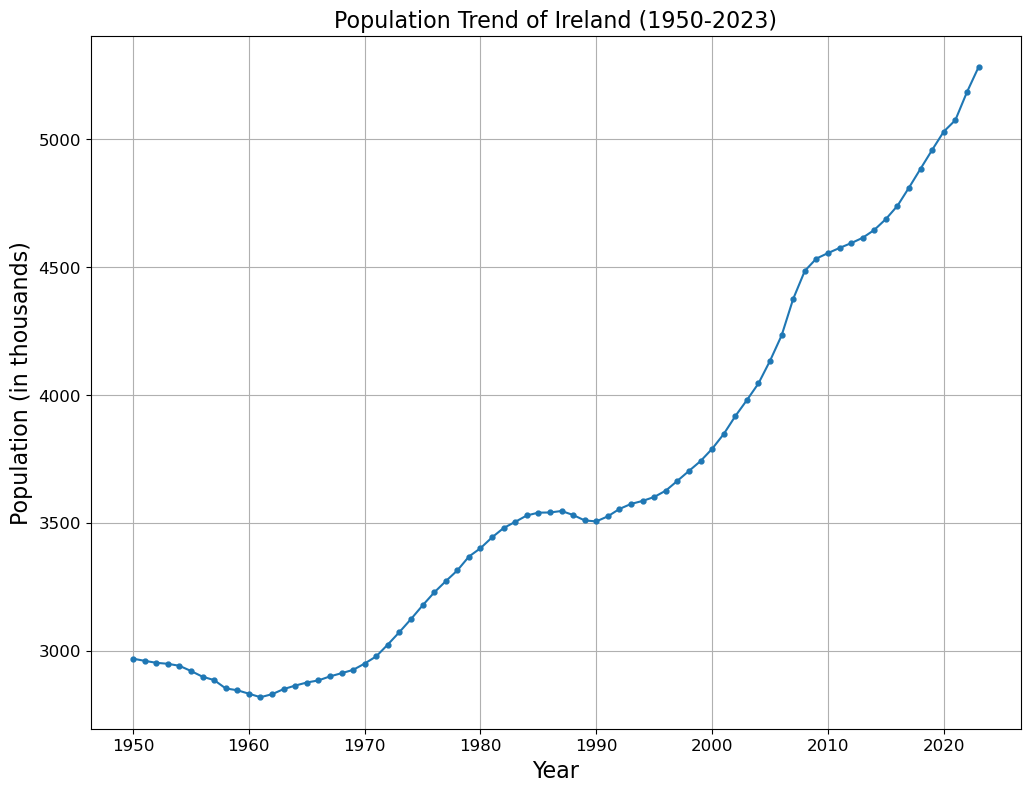

Maximum value in 'All ages' column for 'Both sexes in thousands is': 5281.6
Minimum value in 'All ages' column for 'Both sexes in thousands is': 2818.3


In [86]:
# Reset the indices to turn them into columns
df_broad_pivot.reset_index(inplace=True)

# Filtering the DataFrame for 'Both sexes'
df_both_sexes = df_broad_pivot[df_broad_pivot['sex'] == 'Both sexes']

# Plotting the values for 'All ages' across all years as a line graph
plt.figure(figsize=(12, 9))
plt.plot(df_both_sexes['year'], df_both_sexes['All ages'], marker='o', markersize=3.5)

# Adding gridlines for better readability
plt.grid(True)

# Adding title and labels
plt.title('Population Trend of Ireland (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')

# Save the plot to a location accessible in this environment
plt.savefig('../images/population_trend.png')

# Show the plot
plt.show()

# Find the max and min values in the 'All ages' column
max_value = df_both_sexes['All ages'].max()
min_value =df_both_sexes['All ages'].min()



# Display the results
print("Maximum value in 'All ages' column for 'Both sexes in thousands is':", max_value)
print("Minimum value in 'All ages' column for 'Both sexes in thousands is':", min_value)

# Visualising age structure across time

As altair operates on long_form data we use df_narrow_long

In [87]:
# Filter the DataFrame for 'Both sexes'
df_both_sexes = df_narrow_long[df_narrow_long['sex'] == 'Both sexes']



# Define the list of years for the slider
years = [1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2021, 2022, 2023]

# Create a slider selection for the year
slider = alt.binding_range(min=min(years), max=max(years), step=1, name='Year:')
select_year = alt.selection_single(fields=['year'], bind=slider)

# Create the Altair chart
chart = alt.Chart(df_both_sexes).mark_bar().encode(
    x=alt.X('age_group:N', title='Age Group', sort=narrow_ages),
    y=alt.Y('value:Q', title='Population (in thousands)'),
    tooltip=[alt.Tooltip('age_group:N', title='Age Group'), alt.Tooltip('value:Q', title='Population')],
    color='age_group:N'
).add_selection(
    select_year
).transform_filter(
    select_year
).properties(
    title='Population Age Structure by Year',
    width=600,
    height=400
)
# Configure title and label font sizes
chart = chart.configure_title(fontSize=20) \
              .configure_axis(
                  labelFontSize=17,
                  titleFontSize=19
              )
chart

alt.Chart(...)

In [88]:


for year in years:
    # Filter for the specific year
    df_year = df_both_sexes[df_both_sexes['year'] == year]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(df_year['age_group'], df_year['value'])
    plt.title(f'Population Age Structure in {year}')
    plt.xlabel('Age Group')
    plt.ylabel('Population (in thousands)')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'../images/Population_age_structure_{year}.png')

    # Close the plot to avoid overlapping plots in the next iteration
    plt.close()


### Future Projections
Population projections will be predicted based on commensurate  mortality, fertility, and migration figures that are part of the [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme) Other fiscal data might also be used too if time permits.

In [90]:
# # To clear all variables in an IPython or Jupyter environment
# %reset